Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose

#### A1. Relevant Question

What are the characteristics of customer groups in our dataset?

#### A2. Analysis Goal

The goal of this analysis was to identify the characteristics of our customer groups. Our dataset contained 10,000 customers with many different characteristics. We wanted to use a set of continuous variables as the basis to segment customers into different groups. Then we could look at individual groups to see what characteristics that they exhibited.

### B. Technique Justification

#### B1. K-Means Explanation

The K-means clustering algorithm took in a predefined K value and the dataset. It randomly generated K number of centroids and assigned the nearby points to those centroids based on distance. Then it recalculated the position of the centroids based on the data points (Trevino, 2016). The process continued until all the data points were merged into K clusters.

We expected the algorithm to identify K clusters, where each cluster contained samples that shared similar characteristics with each other.

#### B2. Assumption

The primary assumption when using K-means was that the dataset contained only K clusters. While there were methods to help decide what K may be, deciding on a certain K value was the biggest assumption when using this technique (Roy, 2022). 

#### B3. Packges

The libraries used for this analysis were:

- `numpy`: numeric computation library.
- `pandas`: efficient 1D and 2D data structures, such as Series and DataFrame.
- `matplotlib` and `seaborn`: graphs and figures for data visualizations.
- `scikit-learn`: various classes and functions related to machine learning. 

### C. Data Preparation

#### C1. One Preprocessing Goal

One important preprocessing goal was to remove all the categorical variables from the dataset. The K-means algorithm relied on the distance between the centroids and the data points. Categorical variables did not fulfill this criteria.

#### C2. Initial Dataset

The intial dataset contained 11 continuous variables: `Population`, `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, and `Bandwidth_GB_Year`.

#### C3. Preparation Steps

The steps used to prepare the data were:

1. Import libraries and dataset.
2. Create new dataframe containing only relevant variables.
3. Check and handle duplicated or missing data.
4. Explore variables and their statistics.

**1. Import libraries and dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline

In [2]:
# Import dataset
churn = pd.read_csv('churn_clean.csv')

**2. Create new dataframe with relevant variables**

In [3]:
# Create new dataframe
df = churn[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
            'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].copy()

**3. Handle duplicated and missing data**

In [4]:
# Check for duplicates
df.duplicated().any()

False

In [5]:
# Check for missing values
df.isnull().values.any()

False

**4. Explore variables**

In [6]:
# Dataframe statistics
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


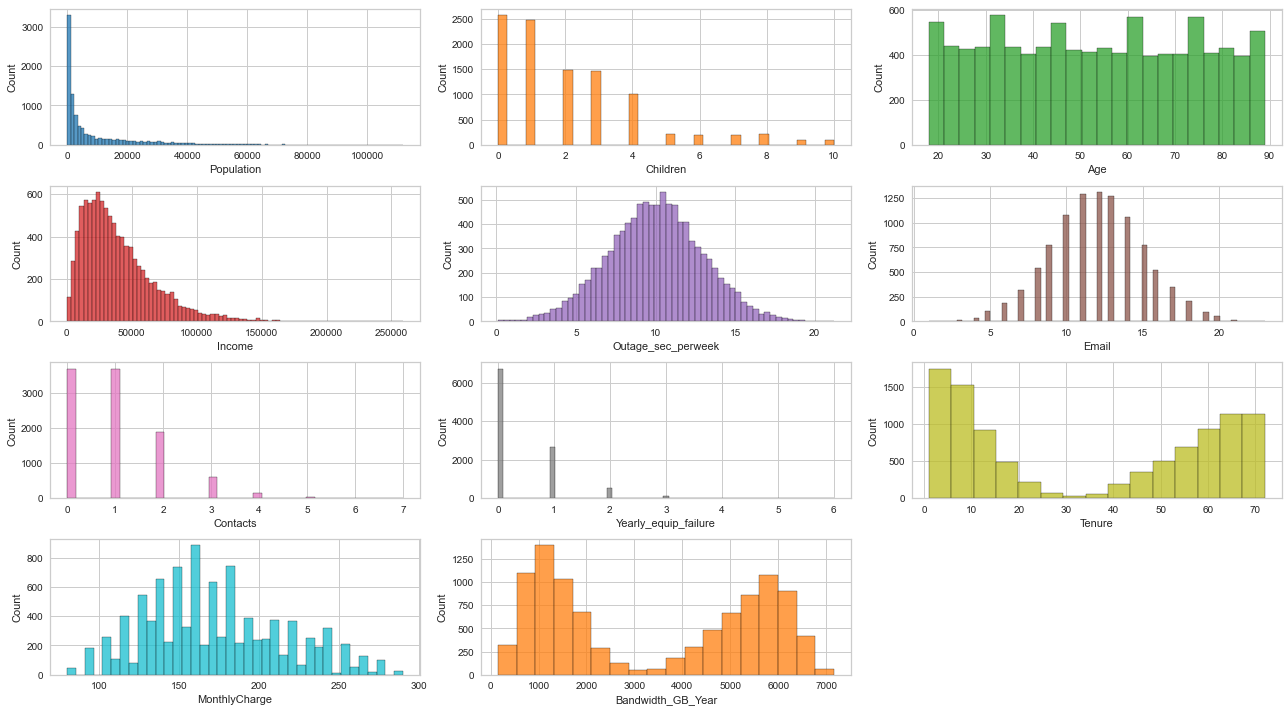

In [7]:
# Color palette
pal = sns.color_palette('tab10')

# Create subplots for variables
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

# Counters for subplot positions and color
x = 0
y = 0
color = 0

# Get list of variables
cont = df.columns.tolist()

# Loop and plot
for idx, var in enumerate(cont):
    # Reset counters at limit
    if y == 3:
        x += 1
        y = 0
    
    sns.histplot(ax=axes[x, y], data=df[var], color=pal[color])
    
    if color == 9:
        color = 0

    # Increment counters
    y += 1
    color += 1
    
fig.delaxes(axes[3, 2])  # Delete empty subplot
plt.tight_layout()
plt.show()

#### C4. Copy of Dataset

In [8]:
# Export cleaned data to CSV
df.to_csv('churn_prep.csv', index=False)

### D. Analysis Process

#### D1. Description of Analysis

The steps to perform the K-means clustering were:
1. Create elbow plot to identify optimal number of clusters.
2. Standardize and apply K-means to dataset.

#### D2. Analysis Code

**1. Create elbow plot**

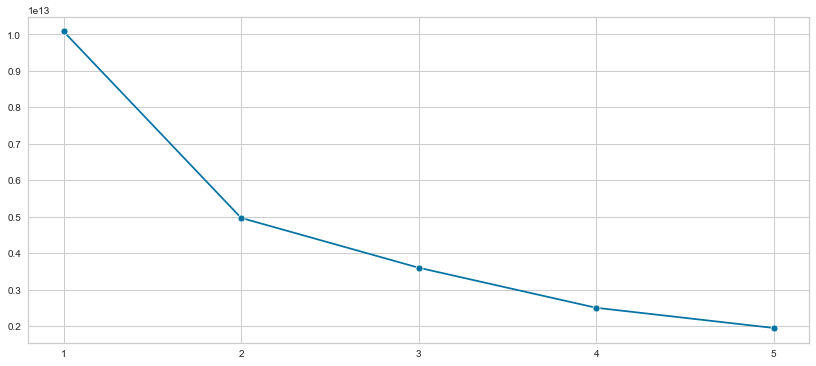

In [9]:
# Adapted from Clustering for Dataset Exploration (Roy, 2022)
# https://app.datacamp.com/learn/courses/unsupervised-learning-in-python

k_vals = range(1, 6)
inertias = []

# Test cluster size 1 to 6
for k in k_vals:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot k values vs inertias
plt.figure(figsize=(14, 6))
sns.lineplot(data=inertias, x=k_vals, y=inertias, marker='o')
plt.xticks(range(1, 6))
plt.show()

**2. Standardize and perform K-means**

In [10]:
# Create scaler and K-means object
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2, random_state=123)

# Perform K-means
kmeans.fit(df)
labels = kmeans.predict(df)

### E. Analysis Summary

#### E1. Technique Accuracy

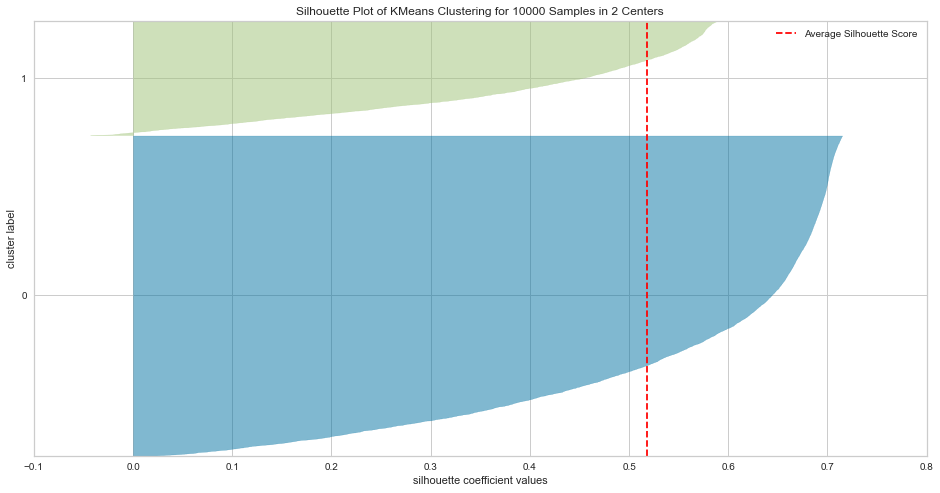

In [11]:
# Adapted from KMeans Silhouette Score Explained (Kumar, 2020)
# https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

# Create K-means instance for visualization
sil_km = KMeans(n_clusters=2, random_state=123)

# Fit and plot silhouette
sil_viz = SilhouetteVisualizer(sil_km, colors='yellowbrick')
plt.figure(figsize=(16, 8))
sil_viz.fit(df.iloc[:, :-1])
sil_viz.show()
plt.show()

In [12]:
# Silhouette score for clusters
sil_score = silhouette_score(df, labels, metric='euclidean')

print(f'The Sihouette Coefficient of the clusters is: {sil_score:.2f}')

The Sihouette Coefficient of the clusters is: 0.51


Unlike supervised learning, unsupervised algorithms such as clustering do not rely on training and testing data. This means that metrics such as accuracy score for classification will not work with clustering. The best metric to evaluate K-means is the Silhouette Coefficient. This value shows the separation distance between neighbor clusters. The best value of 1 means that the clusters are far apart from each other, a 0 means the clusters are overlapping, and negative values mean the samples are assigned to the wrong clusters. The score of our clustering technique is 0.51, which means our clusters are not too far apart from each other but they do not overlap.

#### E2. Results and Implications

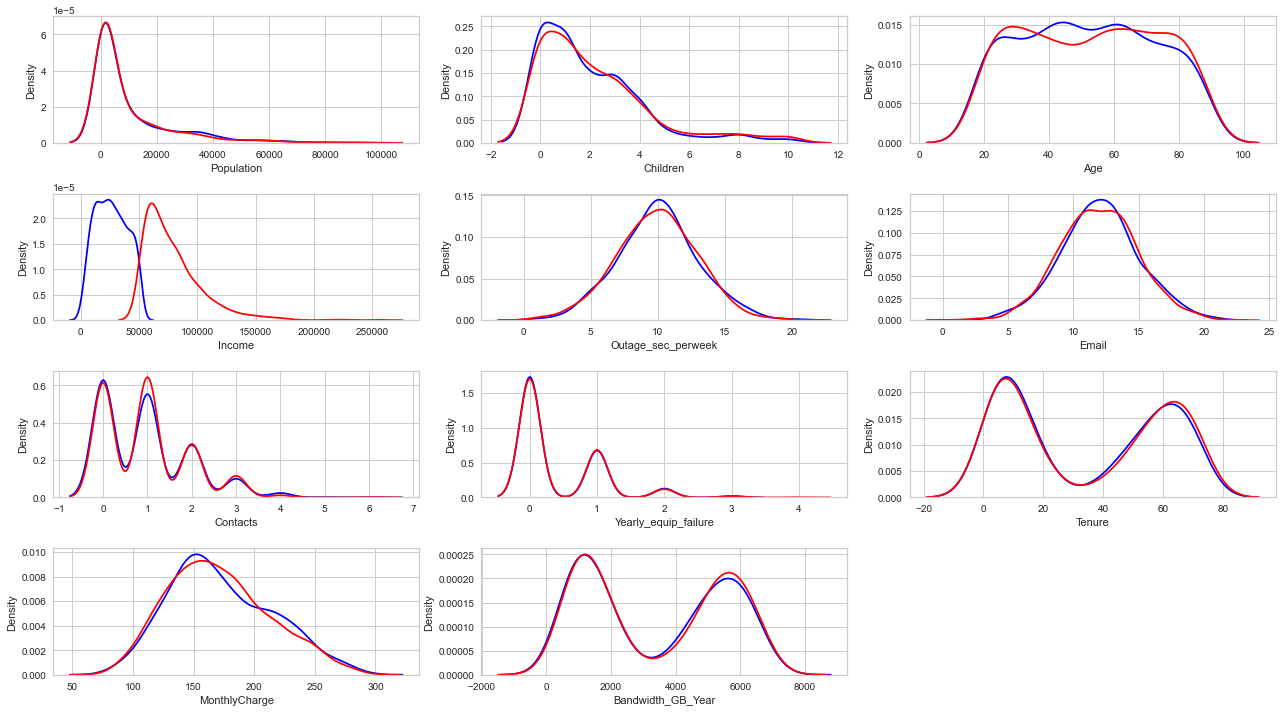

In [13]:
# Add cluster labels to medianaframe
df['Cluster'] = labels

# Create subplots for variables
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

# Counters for subplot positions
x = 0
y = 0

# Get 1000 random samples from each cluster
samp_0 = df[df['Cluster'] == 0].sample(n=1000, random_state=123)
samp_1 = df[df['Cluster'] == 1].sample(n=1000, random_state=123)

# Loop and plot samples
for idx, var in enumerate(cont):
    # Reset counters at limit
    if y == 3:
        x += 1
        y = 0
    
    sns.kdeplot(ax=axes[x, y], data=samp_0[var], color='blue')
    sns.kdeplot(ax=axes[x, y], data=samp_1[var], color='red')
    
    # Increment counters
    y += 1
    
fig.delaxes(axes[3, 2])  # Delete empty subplot
plt.tight_layout()
plt.show()

To identify what characteristics the two clusters had, we extracted 1000 random samples from each cluster. Then we visualized the distribution of the data by creating two KDE plots for each continuous variable. We could see that overall, the clusters were similar to each other in term of their characteristics. The biggest difference we found was that one cluster had customers who earned more income than the other cluster. This implied that income was an important variable since it was the only significant difference between the clusters.

#### E3. Analysis Limitation

One limitation of this analysis was that we selected two clusters as our K value. While the elbow plot indicated two to be the optimal number, there is not one correct way to identify K. The elbow rule is simply a popular method to do so. Testing different values of K could provide us with different results.

#### E4. Recommendation

Since both clusters had almost all of the same characteristics except for income, our recommendation based on this analysis would be to perform classification analysis using income as the dependent variable. Clustering only assigned similar data points to the same cluster, it could not distinguish whether one cluster had higher income or not. Performing classification analysis on income would help us identify variables that had an effect on income and understand why it was different.

### F. Panopto Recording

Link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=30a1ce0b-588c-4fc2-8620-aed7008d58ab

### G. Third-Party Code

Ventouris, T. (2019, April 5). Perform k-means clustering over multiple columns. Data Science Stack Exchange. Retrieved July 7, 2022, from https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

Kumar, A. (2020, September 15). KMeans Silhouette Score Explained with Python Example. Vital Flux. Retrieved July 9, 2022, from https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

### H. References

Trevino, A. (2016, December 6). Introduction to K-means Clustering. Oracle AI & Data Science Blog. Retrieved July 7 https://blogs.oracle.com/ai-and-datascience/post/introduction-to-k-means-clustering

Roy, Y. (2022). Unsupervised Learning in Python. DataCamp. Retrieved July 8, 2022, from https://app.datacamp.com/learn/courses/unsupervised-learning-in-python